### 1. Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 2. Load Dataset

We'll use the Diabetes dataset:

In [6]:
# Load dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Check dataset shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (442, 10)
Target shape: (442,)


In [8]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 3. Split Data into Training and Test Sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

### 4. Feature Scaling

SVR is sensitive to feature scales:

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optional: Scale target variable if needed
# y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

## 5. Create and Train SVR Model

In [22]:
# Initialize SVR with RBF kernel (default)
svr = SVR(
    kernel='rbf',
    C=1.0,          # Regularization parameter
    epsilon=0.1,    # Margin of tolerance
    gamma='scale'   # Kernel coefficient
)

# Train the model
svr.fit(X_train, y_train)

SVR()

## 6. Make Predictions

In [25]:
y_pred = svr.predict(X_test)

### 7. Evaluate Model Performance

Mean Squared Error: 4332.74
Mean Absolute Error: 56.03
R² Score: 0.18


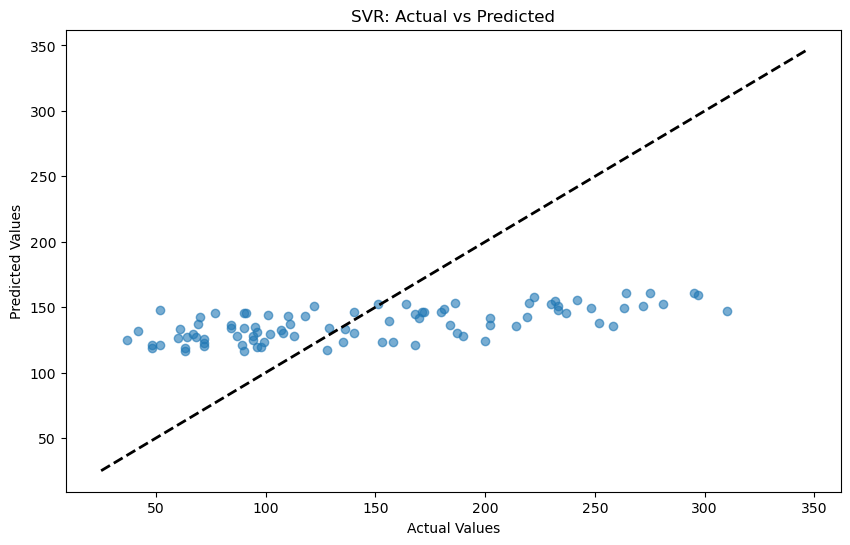

In [30]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.show()

Key Parameters to Tune:

    C: Regularization parameter (higher values = more complex model)

    epsilon: Margin of tolerance where no penalty is given to errors

    kernel: {'linear', 'poly', 'rbf', 'sigmoid'}

    gamma: Kernel coefficient for non-linear kernels

### Hyperparameter Tuning with GridSearchCV:

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_svr = grid.best_estimator_

Best parameters: {'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


Tips:

    Always scale features before using SVR

    For better performance with non-linear relationships:

        Use RBF or polynomial kernels

        Adjust gamma parameter (higher = more complex)

    For noisy data, increase epsilon value

    Consider feature selection for high-dimensional data

    SVR works best with small-to-medium sized datasets (<10k samples)

This example demonstrates a complete workflow for regression using SVR. The model performance can be further improved by feature engineering, outlier removal, and thorough hyperparameter tuning.